In [1]:
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import time
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
df_td = pd.read_csv('tic_2000_train_data.csv')
eval1 = pd.read_csv('tic_2000_eval_data.csv')
target = pd.read_csv('tic_2000_target_data.csv')
#https://www.kaggle.com/kushshah95/the-insurance-company-tic-benchmark

In [3]:
#First looking at the data, it is evident there is a definate imbalnace in the target variable
#Due to the heavy imbalance, I will first try to isolate the features that are directly related to the target
# variable, and then unbalance the data set and use a backwards elimination process to further trim down the features.
print('Target feature in Training Data; Balance', '\n',df_td.CARAVAN.value_counts())
print('Target feature in Target Data; Balance', '\n',target.Target.value_counts())
#No missing values, and all equal head counts.
print('Training Features Dataset; Shape', df_td.shape)
print('Eval Features Dataset; Shape', eval1.shape)
print('Target Feature Dataset; Shape', target.shape)

Target feature in Training Data; Balance 
 0    5474
1     348
Name: CARAVAN, dtype: int64
Target feature in Target Data; Balance 
 0    3762
1     238
Name: Target, dtype: int64
Training Features Dataset; Shape (5822, 86)
Eval Features Dataset; Shape (4000, 85)
Target Feature Dataset; Shape (4000, 1)


In [4]:
df_td.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

##### Several notable items in the datasets above

In [5]:
#renaming variables to easy reading
df_td.rename(columns={'MOSTYPE': 'subtype_L0', 'MAANTHUI':'Num_houses', 'MGEMOMV' : 'Avg_hh_size',
                   'MGEMLEEF':'age_L1', 'MOSHOOFD': 'maintype_L2', 'MGODRK': 'romcath_L3',
                   'MGODPR': 'Protestant','MGODOV' : 'O_religion', 'MGODGE': 'N_religion','MRELGE' :'Married',
                   'MRELSA' : 'Living_together','MRELOV' : 'O_relation','MFALLEEN' : 'Singles','MFGEKIND' : 'hh_wo_child',
                   'MFWEKIND' : 'hh_w_child','MOPLHOOG' : 'H_lvl_edu','MOPLMIDD' : 'M_lvl_edu',
                   'MOPLLAAG' : 'L_lvl_edu','MBERHOOG' : 'H_status','MBERZELF' : 'Entrepreneur','MBERBOER' : 'Farmer',
                   'MBERMIDD' : 'Mid_management','MBERARBG' : 'Skld_labor','MBERARBO' : 'Unskld_labor',
                   'MSKA' : 'Soc_cls_A','MSKB1' : 'Soc_cls_B1','MSKB2' : 'Soc_cls_B2','MSKC' : 'Soc_cls_C',
                   'MSKD' : 'Soc_cls_D','MHHUUR' : 'R_house','MHKOOP' : 'O_house','MAUT1' : '1_car','MAUT2' : '2_cars',
                   'MAUT0' : 'N_car','MZFONDS' : 'Nat_Hlth_Serv','MZPART' : 'Prv_Hlth_Insur','MINKM30' : 'Inc_u_30k',
                   'MINK3045' : 'Inc_btw_30_45k','MINK4575' : 'Inc_btw_45_75k','MINK7512' : 'Inc_75_122k','MINK123M' : 'Inc_ovr_123k',
                   'MINKGEM' : 'Avg_inc','MKOOPKLA' : 'PP_cls','PWAPART' : 'Contri_prv_3p_insur_L4','PWABEDR' : 'Firm_Contri_3p_ insur',
                   'PWALAND' : 'Ag_Contri_3p_insur','PPERSAUT' : 'Contri_car_pol','PBESAUT' : 'Contri_deliv_van_pol',
                   'PMOTSCO' : 'Contri_motorcycle/scooter_pol','PVRAAUT' : 'Contri_lorry_pol','PAANHANG' : 'Contri_trailer_pols',
                   'PTRACTOR' : 'Contri_tractor_pol','PWERKT' : 'Contri_ag_machine_pol','PBROM' : 'Contri_moped_pol',
                   'PLEVEN' : 'Contri_life_insur','PPERSONG' : 'Contri_prv_accid_insur_pol',
                   'PGEZONG' : 'Contri_fam_accid_insur_pol','PWAOREG' : 'Contri_disabl_insur_pol','PBRAND' : 'Contri_fire_pol',
                   'PZEILPL' : 'Contri_surfb_pol','PPLEZIER' : 'Contri_boat_pol','PFIETS' : 'Contri_bike_pol',
                   'PINBOED' : 'Contri_prop_insur_pol','PBYSTAND' : 'Contri_ss_insur_polo','AWAPART' : 'Num_prv_3p_insur',
                   'AWABEDR' : 'Num_firm_3p_insur','AWALAND' : 'Num_ag_3p_insur','APERSAUT' : 'Num_car_pol',
                   'ABESAUT' : 'Num_deliv_van_pol','AMOTSCO' : 'Num_motorcycle/scooter_pol', 'AVRAAUT' : 'Num_lorry_pol','AAANHANG': 'Num_trailer_pol',
                   'ATRACTOR' : 'Num_tractor_pol','AWERKT' : 'Num_ag_machines_pol','ABROM' : 'Num_moped_pol',
                   'ALEVEN' : 'Num_life_insur_pol', 'APERSONG' : 'Num_prv_accid_insur_pol','AGEZONG' : 'Num_fam_ccid_insur_pol',
                   'AWAOREG' : 'Num_disabl_insur_pol','ABRAND' :'Num_fire_pol','AZEILPL' :'Num_surfb_pol','APLEZIER' :'Num_boat_pol',
                   'AFIETS' :'Num_bike_pol','AINBOED' :'Num_prop_insur_pol','ABYSTAND' :'num_ss_insur_pol','CARAVAN' :'Target'},
          inplace=True)

In [6]:
#Dataset had been pre-encoded to remove strings, but further improvements can be made to make the data more readable.
df_td.head()

,subtype_L0,Num_houses,Avg_hh_size,age_L1,maintype_L2,romcath_L3,Protestant,O_religion,N_religion,Married,Living_together,O_relation,Singles,hh_wo_child,hh_w_child,H_lvl_edu,M_lvl_edu,L_lvl_edu,H_status,Entrepreneur,Farmer,Mid_management,Skld_labor,Unskld_labor,Soc_cls_A,Soc_cls_B1,Soc_cls_B2,Soc_cls_C,Soc_cls_D,R_house,O_house,1_car,2_cars,N_car,Nat_Hlth_Serv,Prv_Hlth_Insur,Inc_u_30k,Inc_btw_30_45k,Inc_btw_45_75k,Inc_75_122k,Inc_ovr_123k,Avg_inc,PP_cls,Contri_prv_3p_insur_L4,Firm_Contri_3p_ insur,Ag_Contri_3p_insur,Contri_car_pol,Contri_deliv_van_pol,Contri_motorcycle/scooter_pol,Contri_lorry_pol,Contri_trailer_pols,Contri_tractor_pol,Contri_ag_machine_pol,Contri_moped_pol,Contri_life_insur,Contri_prv_accid_insur_pol,Contri_fam_accid_insur_pol,Contri_disabl_insur_pol,Contri_fire_pol,Contri_surfb_pol,Contri_boat_pol,Contri_bike_pol,Contri_prop_insur_pol,Contri_ss_insur_polo,Num_prv_3p_insur,Num_firm_3p_insur,Num_ag_3p_insur,Num_car_pol,Num_deliv_van_pol,Num_motorcycle/scooter_pol,Num_lorry_pol,Num_trailer_pol,Num_tractor_pol,Num_ag_machines_pol,Num_moped_pol,Num_life_insur_pol,Num_prv_accid_insur_pol,Num_fam_ccid_insur_pol,Num_disabl_insur_pol,Num_fire_pol,Num_surfb_pol,Num_boat_pol,Num_bike_pol,Num_prop_insur_pol,num_ss_insur_pol,Target
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
#Original dataset getting dummies.
pre_enc= ['subtype_L0', 'age_L1', 'maintype_L2', 'romcath_L3', 'Contri_prv_3p_insur_L4']
post_enc_df = pd.get_dummies(df_td, prefix_sep="_", columns=pre_enc)

# Rebalancing data for a 5-1 ratio

In [8]:
from sklearn.utils import resample

#Creating a 5-1 ratio to test how this effects that data.
# separate minority and majority classes
no_policy = post_enc_df[post_enc_df.Target==0][:1740]
has_policy = post_enc_df[post_enc_df.Target==1]

# combine majority and upsampled minority
upsampled = pd.concat([no_policy, has_policy])

new_df = upsampled.sample(frac=1)

# check new class counts
print(new_df.Target.value_counts())
print(new_df.shape)

0    1740
1     348
Name: Target, dtype: int64
(2088, 151)


In [25]:
#importing required modules to see impacts of different feature selection methods
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_roc_curve, classification_report, balanced_accuracy_score, coverage_error
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer


def clf_model_comp(df):
    classifiers = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=15, min_samples_split=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    ]
    
    # Separating out the features
    x =  df.drop('Target', axis=1) #df_td.drop('Target', axis=1)# train_feat
    # Separating out the target
    y = df.Target #df_td.Target#target_feat
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    
    for classifier in classifiers:
        scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1_macro')
        model = classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        print(classifier)
        print('The Training F1 Score is', f1_score(classifier.predict(X_train), y_train))
        print('The Testing F1 Score is', f1_score(predictions, y_test))
        print("accuracy score" '\n', accuracy_score(y_test, predictions))
        print("balanced_accuracy_score" '\n', balanced_accuracy_score(y_test, predictions))
        print("model confusion matrix" '\n', confusion_matrix(y_test, predictions, normalize='all'))
        print("classification_report" '\n', classification_report(y_test, predictions),'\n')
        ax = plt.gca()
        matplotlib.rcParams['figure.figsize'] = (10, 10)
        disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.9)

# Selecting the important features for the dataset

I will use the Embedded method and then Chi-squared to select features in the dataset in order to narrow down my search.

In [9]:
# Separating out the features
X =  new_df.drop('Target', axis=1) #df_td.drop('Target', axis=1)# train_feat
# Separating out the target
y = new_df.Target #df_td.Target#target_feat

In [10]:
#First I am using the Embedded method to narrow down my search. 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV(tol=0.04)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003941
Best score using built-in LassoCV: 0.130688


In [13]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 31 variables and eliminated the other 119 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

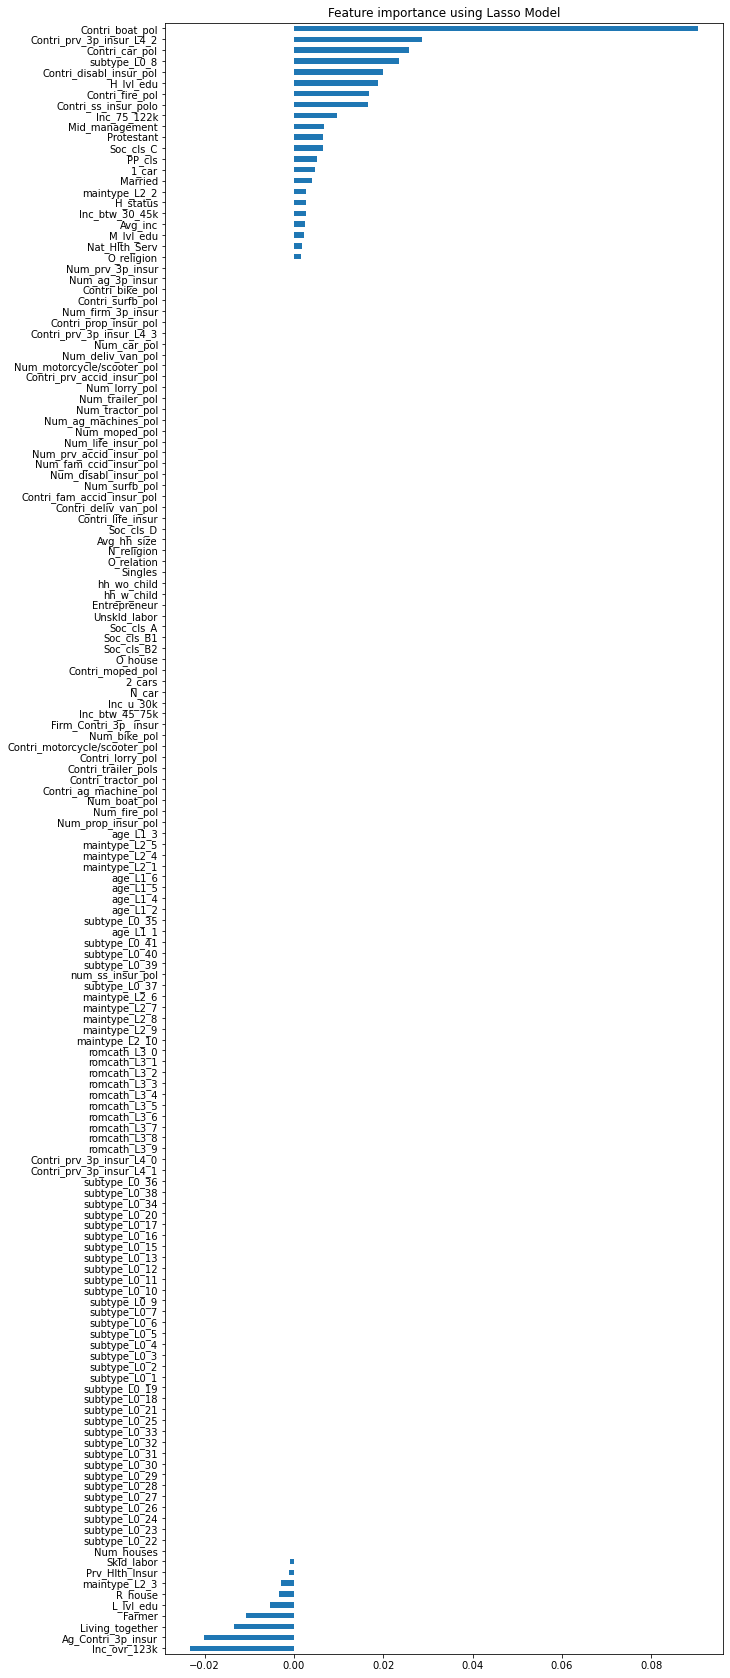

In [14]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 30)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [20]:
lasso_col = new_df[['Contri_boat_pol', 'Contri_prv_3p_insur_L4_2', 'Contri_car_pol', 'subtype_L0_8',
                   'Contri_disabl_insur_pol','H_lvl_edu','Contri_fire_pol','Contri_ss_insur_polo','Inc_75_122k','Mid_management',
                   'Protestant','Soc_cls_C','PP_cls','1_car','Married','maintype_L2_2','H_status','Inc_btw_30_45k','Avg_inc','M_lvl_edu',
                   'Nat_Hlth_Serv','O_religion','Skld_labor','Prv_Hlth_Insur','maintype_L2_3','R_house','L_lvl_edu','Farmer','Living_together',
                   'Ag_Contri_3p_insur','Inc_ovr_123k', 'Target']]

X = lasso_col.drop('Target', axis =1)
y = lasso_col.Target

In [17]:
print(coef)

Num_houses                 -0.000000
Avg_hh_size                -0.000000
Protestant                  0.006496
O_religion                  0.001582
N_religion                 -0.000000
                              ...   
romcath_L3_9               -0.000000
Contri_prv_3p_insur_L4_0   -0.000000
Contri_prv_3p_insur_L4_1   -0.000000
Contri_prv_3p_insur_L4_2    0.028595
Contri_prv_3p_insur_L4_3    0.000000
Length: 150, dtype: float64


KNeighborsClassifier(n_neighbors=3)
The Training F1 Score is 0.5384615384615385
The Testing F1 Score is 0.18000000000000002
accuracy score
 0.8038277511961722
balanced_accuracy_score
 0.5385746606334841
model confusion matrix
 [[0.78229665 0.03110048]
 [0.16507177 0.0215311 ]]
classification_report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       340
           1       0.41      0.12      0.18        78

    accuracy                           0.80       418
   macro avg       0.62      0.54      0.53       418
weighted avg       0.75      0.80      0.76       418
 

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
The Training F1 Score is 0.19292604501607716
The Testing F1 Score is 0.36633663366336633
accuracy score
 0.3875598086124402
balanced_accuracy_score
 0.6037707390648567
model confusion matrix
 [[0.21052632 0.60287081]
 [0.00956938 0.17703349]]
classification_report
               precision    recall  f1-score

C:\Users\Threadripper\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Threadripper\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Threadripper\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Threadripper\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Threadripper\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are

QuadraticDiscriminantAnalysis()
The Training F1 Score is 0.2842049656629688
The Testing F1 Score is 0.0
accuracy score
 0.8133971291866029
balanced_accuracy_score
 0.5
model confusion matrix
 [[0.81339713 0.        ]
 [0.18660287 0.        ]]
classification_report
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       340
           1       0.00      0.00      0.00        78

    accuracy                           0.81       418
   macro avg       0.41      0.50      0.45       418
weighted avg       0.66      0.81      0.73       418
 



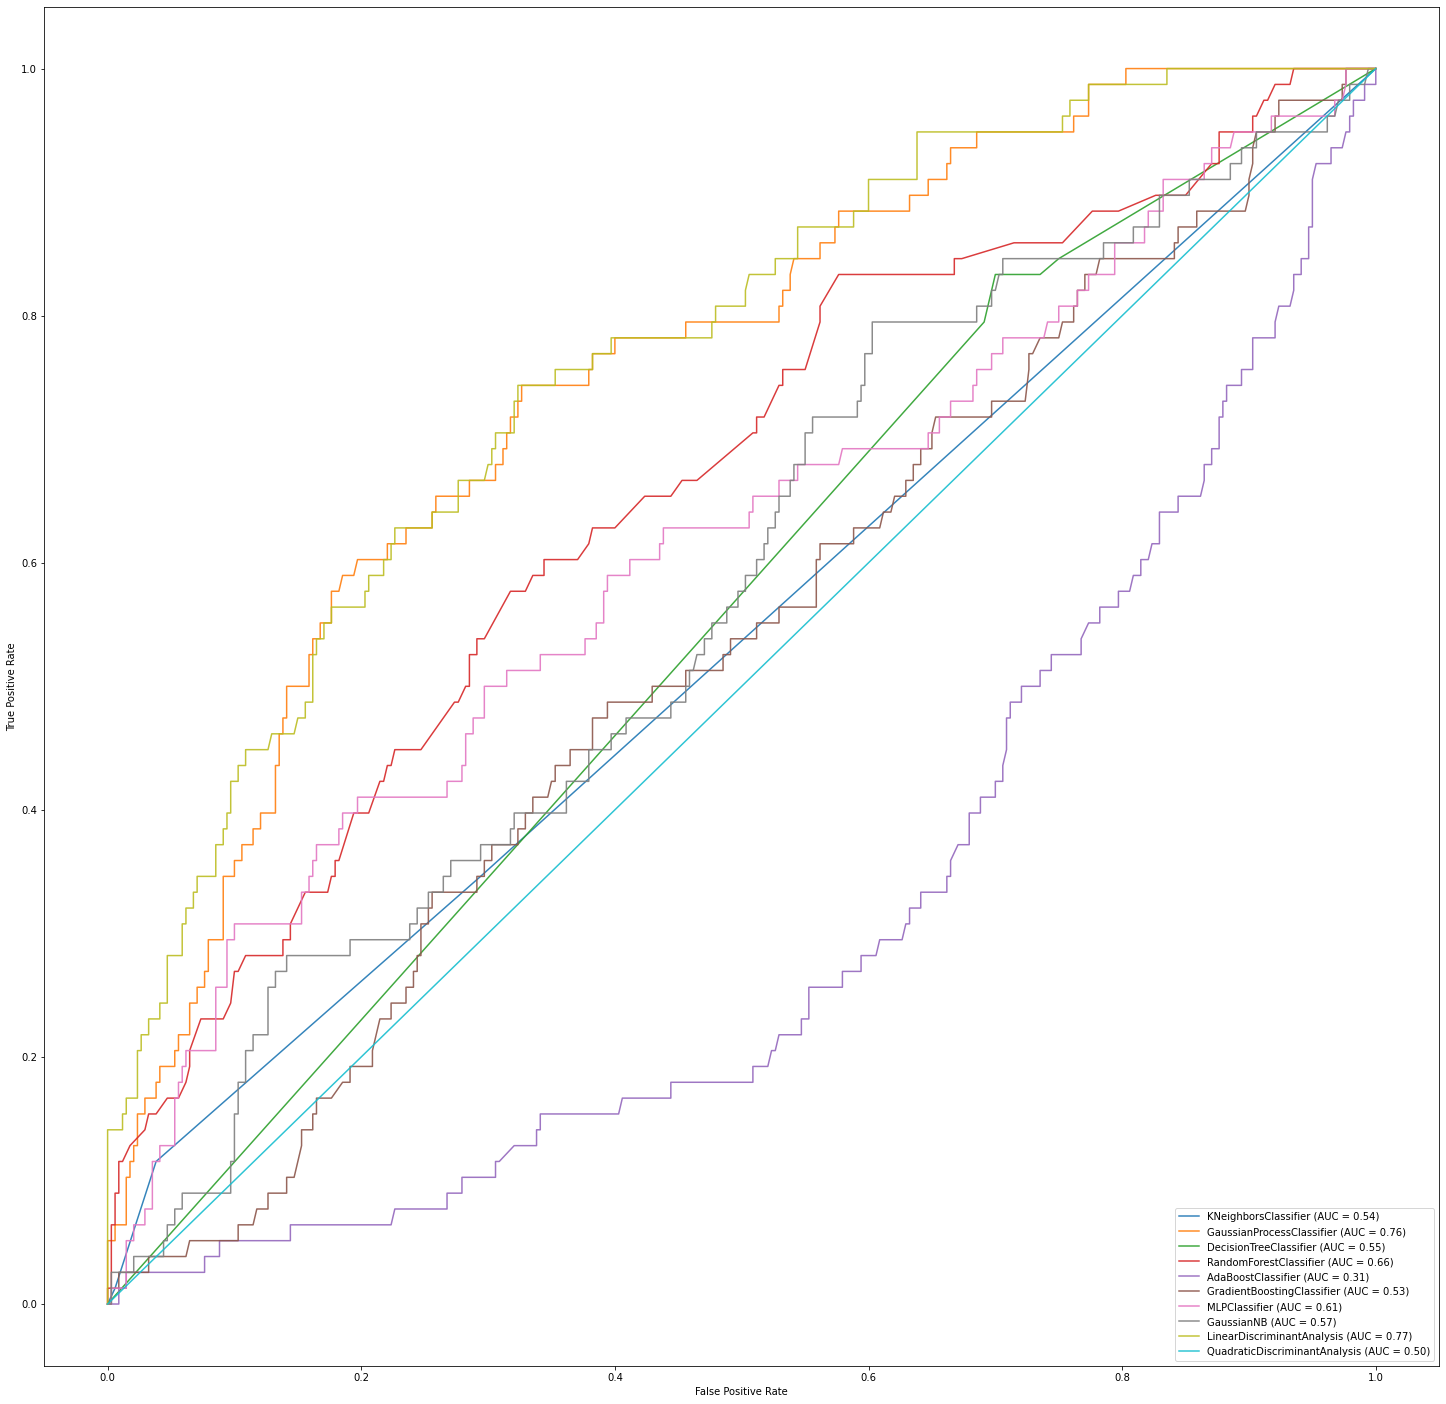

In [26]:
clf_model_comp(lasso_col)

In [ ]:
#Now using the Chi-Squared method
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
matplotlib.rcParams['figure.figsize'] = (30, 10)
p_values.plot.bar()

In [ ]:
#Creating a quick function to find occurances of the target variable
def find_target(df):
    has_target = df['Target']==1
    df_w_target = df[has_target]
    return df_w_target

In [ ]:
#Creating function which sorts and filters and ranks the strongest relationships
def rel_str(df):
    pps_matrix = df.abs()
    rel_str = (pps_matrix.where(np.triu(np.ones(df.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    print("The medium/strong relationships are:", '\n', rel_str[rel_str>0.5])

In [ ]:
#Creating PPS heatmap chart
def heatmap(df):
    plt.figure(figsize=(75,75))
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax, rel_str(df)

In [ ]:
# Creating Corr heatmap chart
def corr_heatmap(df):
    plt.figure(figsize=(75,75))
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

Visualizing what other variables of those who with insurance policies have in common

In [ ]:
# Using SweetViz for visualizing the overall data to determine where to further investigate
#You will need to have a full screen to see whats on the right side.
import sweetviz as sv
#config reports
#Configuring the reports, early attempts automatically catagorized MOSTYPE and PWAPART as numberical rather than categorical
cfg_1 = sv.FeatureConfig(force_cat=['subtype_L0'])
cfg_2 = sv.FeatureConfig(force_cat=['Contri_prv_3p_insur_L4'])

In [ ]:
#Comparing all data to each other and the target variable
report_combined = sv.analyze([find_target(post_enc_df), "Combined"], target_feat = "Target")
report_combined.show_html("Report_Combined.html")

## Explaination of functions above:

I used the "find_target" function to quickly find which variables were directly associated with our Target variable "CARAVAN".

The report that is created shows the dtypes, correlations and associations, histograms of how the data distributes, and which features provide information on others. Only keeping the rows where CARAVAN = 1, we can see patterns begin to appear. For example, Contri_Lorry_pol gives no information on our target variable and can be dropped from the larger dataset to see how it effects the models.

# PPS Matrix Heatmaps

Below are PPS matrix Heatmaps. A PPS matrix measures the predictive probability of one feature against  another feature. Due to the size of the dataset I wanted to use this to better understand the inner relationships.

In [ ]:
import ppscore as pps

In [ ]:
#Creating the PPS matrix of Socio-economic Demographics with Target Variable CARAVAN
df_matrix_soec = pps.matrix(df_td.iloc[:, 0:43])

# PPS Matrix heatmap for Socio-economic Demographics
heatmap(df_matrix_soec)

In [ ]:
corr_heatmap(find_target(post_enc_so_df))

In [ ]:
#Creating PPS matrix for Policy Ownership data including the target variable
df_matrix_own = pps.matrix(post_enc_own_df)

#Heatmap of PPS Policy Ownership data
heatmap(df_matrix_own)

In [ ]:
#Applying to entire dataset
df_matrix_td = pps.matrix(post_enc_df)

#PPS matrix heatmap
heatmap(df_matrix_td)

# Now that we have a rough idea on how everything relates, time to start dropping column features and narrowing down the search.

In [ ]:
#First I am going ot drop columns that have a mean of 0 found in the find_target function.
#These are the columns that simply provide no information on the target variable
cols = x.columns
new_df = find_target(post_enc_df).drop(cols )

In [ ]:
KNeighborsClassifier().get_params().keys()

In [ ]:
clf_model_comp(new_df)

In [ ]:
#Since there are so many different features still, I will further limit the number of features by finding those
# with a mean less that .05 and then dropping them. This will target the Policy Ownership group since they are binary.
find_target(post_enc_df).describe()

In [ ]:
# Separating out the features
cols = ['Contri_lorry_pol','romcath_L3_7', 'romcath_L3_8', 'romcath_L3_9', 'maintype_L2_4','subtype_L0_40','subtype_L0_28',
                 'subtype_L0_21', 'subtype_L0_19','subtype_L0_18','subtype_L0_17', 'subtype_L0_16','subtype_L0_15','Num_ag_machines_pol',
                 'Num_lorry_pol','Contri_ag_machine_pol']

updated_df =  new_df.drop(cols, axis=1) #df_td.drop('Target', axis=1)# train_feat

In [ ]:
updated_df.shape

In [ ]:
clf_model_comp(updated_df)

In [ ]:
RandomForestClassifier().get_params().keys()

In [ ]:
x = updated_df.drop('Target', axis =1)
y = updated_df.Target

In [ ]:
#First split the data and create upsampled data set.
from sklearn.model_selection import train_test_split


#Create training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

In [ ]:
grid_obj = GridSearchCV(DecisionTreeClassifier(), parameters, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(X_train, y_train)

In [ ]:
best_clf = grid_fit.best_estimator_
best_clf

In [ ]:
# sliced the data into its main features

# Train-test-split

In [ ]:
print(x.shape)
print(y.shape)

# Run PCA to find components

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=92, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
## It will give eigen values
print(pca.explained_variance_)

X_train_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca.shape)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [ ]:
features_n = range(pca.n_components_)
pd.DataFrame(pca.components_, columns=x.columns, index=['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46', 'pc_47', 'pc_48','pc_49','pc_50','pc_51','pc_52','pc_53','pc_54','pc_55','pc_56','pc_57','pc_58','pc_59','pc_60','pc_61','pc_62','pc_63','pc_64','pc_65','pc_66','pc_67','pc_68','pc_69','pc_70','pc_71','pc_72','pc_73','pc_74','pc_75','pc_76','pc_77','pc_78','pc_79','pc_80','pc_81','pc_82','pc_83','pc_84','pc_85','pc_86','pc_87','pc_88','pc_89','pc_90'])

In [ ]:
plt.figure(figsize=[25,25])
plt.bar(features_n, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_n)
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_pca, y_train)
y_pred = baseline.predict(X_test_pca)
print(round(accuracy_score(y_test, y_pred),4))

# Data imbalance issue. Will adjust by Oversampling minority class and compare results

In [ ]:
# separate minority and majority classes
no_policy = post_enc_df[post_enc_df.CARAVAN==0][:348]
has_policy = post_enc_df[post_enc_df.CARAVAN==1]

# upsample minority
has_pol_upsampled = resample(has_policy,
                          replace=True, # sample with replacement
                          n_samples=len(no_policy), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_policy, has_pol_upsampled])

new_df = upsampled.sample(frac=1, random_state=42)

# check new class counts
new_df.CARAVAN.value_counts()

In [ ]:
y_train_up = new_df.CARAVAN
x_train_up = new_df.drop('CARAVAN', axis=1)

In [ ]:
print(x_train_up.shape, y_train_up.shape)

In [ ]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(x_train_up, y_train_up, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train_up)
X_train = scaler.transform(X_train_up)
print(X_train_up)

In [ ]:
pca = PCA(.95)
pca.fit(X_train_up)

PCA(copy=True, iterated_power='auto', n_components=153, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_up, y_train_up)
y_pred = baseline.predict(X_test)
print(round(accuracy_score(y_test, y_pred),4))

#Below is the regular sampled data 

# Below is the oversampled data

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = post_enc_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [ ]:
#Find importance of features in top 3 systems

# Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_gbc = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
pd.set_option("max_rows", None)

In [ ]:
feature_importances_gbc

# RandomForest

In [ ]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rfc

# AdaBoost

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=200)
model_abc = abc.fit(X_train_up, y_train_up)


In [ ]:
predictions = model_abc.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
feature_importances_abc = pd.DataFrame(abc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_abc

In [ ]:
# T-SNE Implementation
t0 = time.time()
X_train_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_train_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_train_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(x.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No policy', 'Policy']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Policy')
red_patch = mpatches.Patch(color='#AF0000', label='Policy')


# t-SNE scatter plot
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()